In [68]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_bar, coord_flip, theme, element_text, xlab, theme_minimal, geom_point, geom_jitter, geom_histogram, facet_grid, geom_boxplot, ylab


# Ex. 2)
Nas Seções 11.1 a 11.12 em [39], o estatístico Rafael A. Irizarry destaca 11 conjuntos de problemas que podem aparecer nos gráficos gerados pela biblioteca ggplot2 (R)/plotnine (Python) e discute, quando pertinentes, soluções em R para contorná-los. Porte essas soluções em R para Python.

## 11.4)

In [55]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
url = "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/extdata/murders.csv"

# Lendo o dataset em um DataFrame do pandas
df_murders = pd.read_csv(url)

df_murders.head()



,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [56]:
# Código original em R

# data(murders)
# murders |> mutate(murder_rate = total / population * 100000) |>
#   mutate(state = reorder(state, murder_rate)) |>
#   ggplot(aes(state, murder_rate)) +
#   geom_bar(stat="identity") +
#   coord_flip() +
#   theme(axis.text.y = element_text(size = 6)) +
#   xlab("")

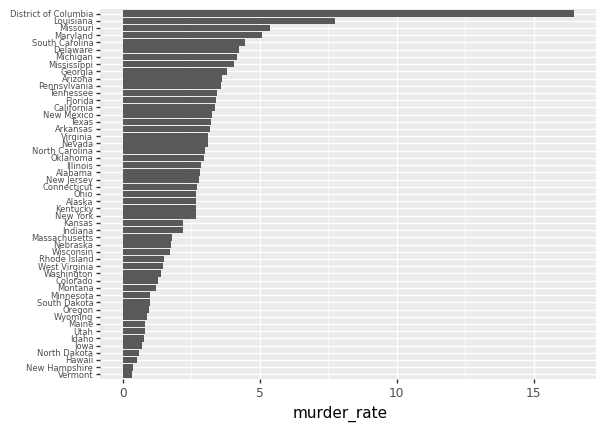

{<ggplot: (681963671)>}

In [57]:
# Código convertido para python

def calc_murder_rate(df):
    df['murder_rate'] = df['total'] / df['population'] * 100000.0
    return df

def reorder_df(df):
    df = df.sort_values(by='murder_rate', ascending=False)
    df['state'] = pd.Categorical(df['state'], categories=df['state'], ordered=True)
    return df

df = (df_murders
      .pipe(calc_murder_rate)
      .pipe(reorder_df))

{
    ggplot(df) + aes(x='reorder(state, murder_rate)', y ='murder_rate') + \
    geom_bar(stat='identity') + \
    coord_flip() + \
    theme(axis_text_y=element_text(size=6)) + \
    xlab("")
}

## 11.5)

In [58]:
# Importando o dataset murders

# URL do dataset murders no GitHub do dslabs
path = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/heights.csv"

# Lendo o dataset em um DataFrame do pandas
df_heights = pd.read_csv(path)

display(df_heights.head())

,rownames,sex,height
0,1,Male,75.0
1,2,Male,70.0
2,3,Male,68.0
3,4,Male,74.0
4,5,Male,61.0


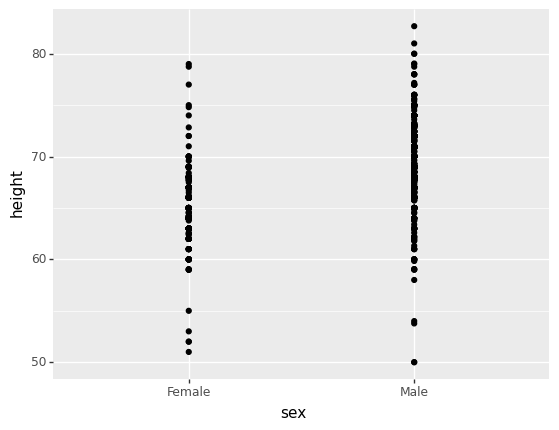

{<ggplot: (681325900)>}

In [60]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_point()

}

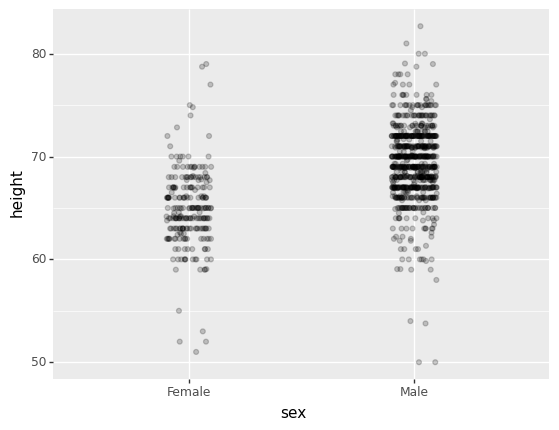

{<ggplot: (682480168)>}

In [63]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_jitter(width = 0.1, alpha = 0.2) 

}

## 11.6)

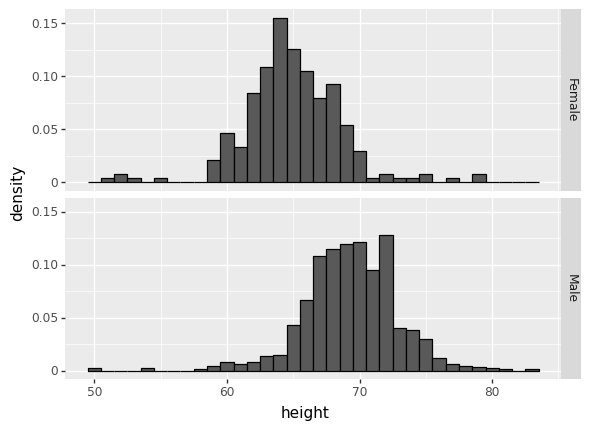

{<ggplot: (678901998)>}

In [67]:
{
    ggplot(df_heights) + aes(x='height', y ='..density..') + \
    geom_histogram(binwidth=1, color="black") + \
    facet_grid('sex ~ .')

}

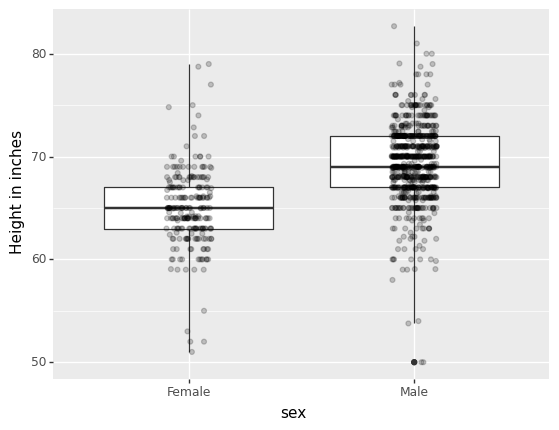

{<ggplot: (679720563)>}

In [69]:
{
    ggplot(df_heights) + aes(x='sex', y ='height') + \
    geom_boxplot(coef=3) + \
    geom_jitter(width = 0.1, alpha = 0.2) + \
    ylab("Height in inches")
}